In [1]:
from __future__ import print_function
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Activation, Convolution2D, GlobalAveragePooling2D, merge
from keras.utils import np_utils
from keras.optimizers import SGD
from keras import backend as K
from keras.models import Model
from keras.layers.core import Lambda
from keras.callbacks import ModelCheckpoint
import pandas
import cv2
import numpy as np
import matplotlib.pyplot as plt

/opt/app-root/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/app-root/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/app-root/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/app-root/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (

In [2]:
K.set_image_dim_ordering('tf')

config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} ) 
sess = tf.Session(config=config) 
K.set_session(sess)

batch_size = 32
nb_classes = 10
nb_epoch = 350

rows, cols = 32, 32

channels = 3

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

print (X_train.shape[1:])

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
(32, 32, 3)


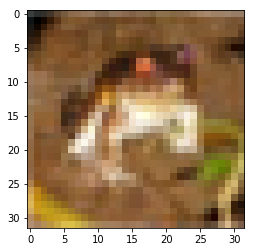

In [4]:
imgid = 0
image = X_train[imgid]
#image = image.transpose([1, 2, 0])
image = image.astype('float32')
image /= 255

%matplotlib inline
imgplot = plt.imshow(image)

categoryid = y_train[imgid]

In [5]:
model = Sequential()

model.add(Convolution2D(96, 3, 3, border_mode = 'same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3,border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3, border_mode='same', subsample = (2,2)))
model.add(Dropout(0.5))

model.add(Convolution2D(192, 3, 3, border_mode = 'same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3,border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3,border_mode='same', subsample = (2,2)))
model.add(Dropout(0.5))

model.add(Convolution2D(192, 3, 3, border_mode = 'same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 1, 1,border_mode='valid'))
model.add(Activation('relu'))
model.add(Convolution2D(10, 1, 1, border_mode='valid'))

model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))
#model = make_parallel(model, 4)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

W0728 21:19:28.370809 140217770448704 deprecation_wrapper.py:119] From /opt/app-root/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
W0728 21:19:28.372157 140217770448704 deprecation_wrapper.py:119] From /opt/app-root/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 21:19:28.373796 140217770448704 deprecation_wrapper.py:119] From /opt/app-root/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/op

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print (model.summary())

W0728 21:19:28.490992 140217770448704 deprecation_wrapper.py:119] From /opt/app-root/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0728 21:19:28.496990 140217770448704 deprecation_wrapper.py:119] From /opt/app-root/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 192)       166080    
__________

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape[0])

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False) 

datagen.fit(X_train)
print(X_train.shape[0])

filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max')

callbacks_list = [checkpoint]

# Fit the model on the batches generated by datagen.flow().
import tensorflow as tf
with tf.device('/device:XLA_GPU:0'):
    history_callback = model.fit_generator(datagen.flow(X_train, Y_train,
                                        batch_size=batch_size),
                                        samples_per_epoch=X_train.shape[0],
                                        nb_epoch=nb_epoch,
                                        validation_data=(X_test, Y_test),
                                        callbacks=callbacks_list, verbose=1)

im = cv2.resize(cv2.imread('image.jpg'), (224, 224)).astype(np.float32)
out = model.predict(im)
print (np.argmax(out))

pandas.DataFrame(history_callback.history).to_csv("history.csv")

model.save('keras_allconv.h5')

50000


/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=1562, epochs=350)`
W0728 21:19:29.174549 140217770448704 deprecation.py:323] From /opt/app-root/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed 

50000
Epoch 1/350


InvalidArgumentError: Cannot assign a device for operation training/SGD/Variable: Could not satisfy explicit device specification '/device:XLA_GPU:0' because no supported kernel for XLA_GPU devices is available.
Colocation Debug Info:
Colocation group had the following types and supported devices: 
Root Member(assigned_device_name_index_=-1 requested_device_name_='/device:XLA_GPU:0' assigned_device_name_='' resource_device_name_='/device:XLA_GPU:0' supported_device_types_=[CPU] possible_devices_=[]
IsVariableInitialized: CPU 
Assign: CPU 
Identity: CPU XLA_CPU XLA_GPU 
VariableV2: CPU 

Colocation members, user-requested devices, and framework assigned devices, if any:
  training/SGD/Variable (VariableV2) /device:XLA_GPU:0
  training/SGD/Variable/Assign (Assign) /device:XLA_GPU:0
  training/SGD/Variable/read (Identity) /device:XLA_GPU:0
  training/SGD/Assign (Assign) /device:XLA_GPU:0
  IsVariableInitialized_22 (IsVariableInitialized) /device:XLA_GPU:0

Op: VariableV2
Node attrs: shared_name="", dtype=DT_FLOAT, container="", shape=[3,3,3,96]
Registered kernels:
  device='GPU'; dtype in [DT_INT64]
  device='GPU'; dtype in [DT_DOUBLE]
  device='GPU'; dtype in [DT_FLOAT]
  device='GPU'; dtype in [DT_HALF]
  device='CPU'

	 [[node training/SGD/Variable (defined at /opt/app-root/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:402) ]]

Original stack trace for 'training/SGD/Variable':
  File "/opt/rh/rh-python36/root/usr/lib64/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/rh/rh-python36/root/usr/lib64/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/app-root/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/app-root/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/opt/app-root/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/opt/rh/rh-python36/root/usr/lib64/python3.6/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/opt/rh/rh-python36/root/usr/lib64/python3.6/asyncio/base_events.py", line 1426, in _run_once
    handle._run()
  File "/opt/rh/rh-python36/root/usr/lib64/python3.6/asyncio/events.py", line 127, in _run
    self._callback(*self._args)
  File "/opt/app-root/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/opt/app-root/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/app-root/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/opt/app-root/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/opt/app-root/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 378, in dispatch_queue
    yield self.process_one()
  File "/opt/app-root/lib/python3.6/site-packages/tornado/gen.py", line 346, in wrapper
    runner = Runner(result, future, yielded)
  File "/opt/app-root/lib/python3.6/site-packages/tornado/gen.py", line 1080, in __init__
    self.run()
  File "/opt/app-root/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/opt/app-root/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/opt/app-root/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/opt/app-root/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/opt/app-root/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/opt/app-root/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "/opt/app-root/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/opt/app-root/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/opt/app-root/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/opt/app-root/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2854, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/opt/app-root/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2880, in _run_cell
    return runner(coro)
  File "/opt/app-root/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/opt/app-root/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3057, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/opt/app-root/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3248, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/opt/app-root/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-50973841206e>", line 36, in <module>
    callbacks=callbacks_list, verbose=1)
  File "/opt/app-root/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/opt/app-root/lib/python3.6/site-packages/keras/engine/training.py", line 1418, in fit_generator
    initial_epoch=initial_epoch)
  File "/opt/app-root/lib/python3.6/site-packages/keras/engine/training_generator.py", line 40, in fit_generator
    model._make_train_function()
  File "/opt/app-root/lib/python3.6/site-packages/keras/engine/training.py", line 509, in _make_train_function
    loss=self.total_loss)
  File "/opt/app-root/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/opt/app-root/lib/python3.6/site-packages/keras/optimizers.py", line 193, in get_updates
    moments = [K.zeros(shape) for shape in shapes]
  File "/opt/app-root/lib/python3.6/site-packages/keras/optimizers.py", line 193, in <listcomp>
    moments = [K.zeros(shape) for shape in shapes]
  File "/opt/app-root/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 704, in zeros
    return variable(v, dtype=dtype, name=name)
  File "/opt/app-root/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 402, in variable
    v = tf.Variable(value, dtype=tf.as_dtype(dtype), name=name)
  File "/opt/app-root/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 259, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "/opt/app-root/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 220, in _variable_v1_call
    shape=shape)
  File "/opt/app-root/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 198, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "/opt/app-root/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 2511, in default_variable_creator
    shape=shape)
  File "/opt/app-root/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 263, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "/opt/app-root/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 1568, in __init__
    shape=shape)
  File "/opt/app-root/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 1728, in _init_from_args
    name=name)
  File "/opt/app-root/lib/python3.6/site-packages/tensorflow/python/ops/state_ops.py", line 79, in variable_op_v2
    shared_name=shared_name)
  File "/opt/app-root/lib/python3.6/site-packages/tensorflow/python/ops/gen_state_ops.py", line 1609, in variable_v2
    shared_name=shared_name, name=name)
  File "/opt/app-root/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/opt/app-root/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/opt/app-root/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3616, in create_op
    op_def=op_def)
  File "/opt/app-root/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()
